In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip gdrive/My\ Drive/data/zipfer.zip > /dev/null

Mounted at /content/gdrive
replace fer2013/test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import os
import cv2


In [3]:
img_size=224
X_train=[]
y_train=[]
classes=["0","1","2","3","4","5","6"]
dir="/content/fer2013/train"
for i in classes:
    path=os.path.join(dir,i)
    class1=classes.index(i)
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(image,(224,224))
        X_train.append(new_array)
        y_train.append(class1)


X_train=np.array(X_train).reshape(-1,224,224,3)
y_train=np.array(y_train)

In [4]:
from keras import layers
from keras import models

model=keras.applications.MobileNetV2()


input_base=model.layers[0].input
output_base=model.layers[-2].output
new_output=layers.Dense(128,activation='relu')(output_base)
new_output=layers.Dense(256,activation='relu')(new_output)
new_output=layers.Dense(7,activation='softmax')(new_output)


new_model=keras.Model(input_base,new_output)

new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

new_model.fit(X_train,y_train,shuffle=True,batch_size=32,epochs=30)


Epoch 1/30
898/898 [==============================] - 211s 196ms/step - loss: 1.2562 - accuracy: 0.5259
Epoch 2/30
898/898 [==============================] - 181s 202ms/step - loss: 1.0844 - accuracy: 0.5955
Epoch 3/30
898/898 [==============================] - 182s 203ms/step - loss: 1.0097 - accuracy: 0.6209
Epoch 4/30
898/898 [==============================] - 182s 203ms/step - loss: 0.9485 - accuracy: 0.6451
Epoch 5/30
898/898 [==============================] - 182s 203ms/step - loss: 0.8911 - accuracy: 0.6697
Epoch 6/30
898/898 [==============================] - 182s 203ms/step - loss: 0.8419 - accuracy: 0.6864
Epoch 7/30
898/898 [==============================] - 183s 203ms/step - loss: 0.7940 - accuracy: 0.7075
Epoch 8/30
898/898 [==============================] - 183s 204ms/step - loss: 0.7420 - accuracy: 0.7258
Epoch 9/30
898/898 [==============================] - 184s 204ms/step - loss: 0.6850 - accuracy: 0.7502
Epoch 10/30
898/898 [==============================] - 184s 204m

KeyboardInterrupt: ignored

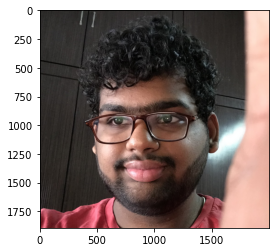

In [15]:
X_test=[]
image=plt.imread("/content/happy.jpg")
plt.imshow(image)
new_array=cv2.resize(image,(224,224))
X_test.append(new_array)
X_test=np.array(X_train)
pred=np.argmax(new_model.predict(X_test),axis=1)

In [25]:
pred[0]

3

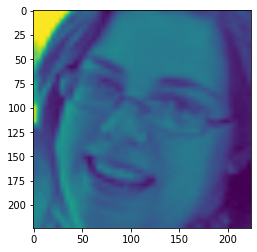

In [24]:
image = plt.imread("/content/fer2013/train/3/Training_10019449.jpg")
image=cv2.resize(image,(224,224))
plt.imshow(image)